In [ ]:
import pyspark.sql.functions as F

In [ ]:
df_sub = spark.read.parquet("/FileStore/tables/comments_all") 
df_sub = df_sub.withColumn("created_utc", F.from_unixtime("created_utc"))
df_sub = df_sub.withColumn("created_date", F.to_date("created_utc"))

In [ ]:
# id: The submission's identifier
df_sub_summary = df_sub.select('id', 'created_date')
df_sub_summary.show(3)

+------+------------+
 id|created_date|
+------+------------+
lqcym0| 2021-02-23|
lqerh1| 2021-02-23|
lqeub2| 2021-02-23|
+------+------------+
only showing top 3 rows

In [ ]:
from pyspark.sql.functions import year, month
df_sub_summary = df_sub_summary.dropDuplicates()
df_sub_summary = df_sub_summary.withColumn('year', year(df_sub_summary.created_date)) \
    .withColumn('month', month(df_sub_summary.created_date))


In [ ]:
from pyspark.sql.functions import date_format, to_date
df_time_series_ver2 = df_sub_summary.withColumn('year_month', date_format(to_date(F.col('created_date'), 'yyyy-MM-DD'), 'yyyy-MM'))
df_time_series_for_plot = df_time_series_ver2.groupBy('year_month') \
    .count() \
    .orderBy(F.col('year_month')).toPandas()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

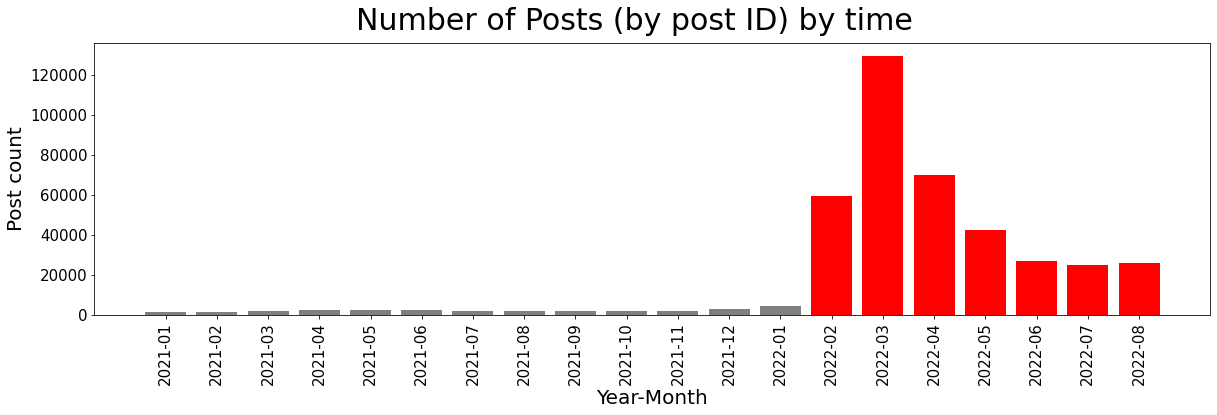

In [ ]:
fig = plt.figure()
fig.set_size_inches(20,5)

fig.suptitle("Number of Posts (by post ID) by time", fontsize=30)

x_values = df_time_series_for_plot['year_month']
y_values = df_time_series_for_plot['count']

clrs = ['grey' if (x <= 20000) else 'red' for x in y_values]

plt.bar(x_values, y_values, color=clrs)
plt.xlabel("Year-Month", fontsize=20)
plt.xticks(fontsize=15, rotation='vertical')
plt.ylabel("Post count", fontsize=20)
plt.yticks(fontsize=15)
plt.savefig('/dbfs/FileStore/post_count_by_time.png')
plt.show()